# **Experiment-2**

**AIM**: To construct a Machine learning model for 3-class prediction(agree, disagree and discuss) and to make the model learn to  well differentiate the articles between related labels.



In [ ]:
# import libraries
import pandas as pd
import numpy as np
import os
import re
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords

## Compute Semantic Textual Similarity between two texts using Pytorch and SentenceTransformers

In [ ]:
import pandas as pd
X_train = pd.read_csv('feature_selection_real_test_data.csv')
X_train_=X_train[['Headline','articleBody']]

X_train_['stance_en']=X_train['stance_base'].replace({'unrelated':0,'related':1})
y_train=X_train_['stance_en']
X_train1=X_train_[['Headline','articleBody']]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
X_train1.iloc[0]

Headline       ab de villiers wife danielle welcomed newborn ...
articleBody    south africa royal challengers bangalore batsm...
Name: 0, dtype: object

In [ ]:

from sentence_transformers import SentenceTransformer, util
import numpy as np

## Model Selection and Initialization

In [ ]:
# sbert.net_models_bert-base-nli is used as a pre-train model
model = SentenceTransformer(r'C:\Users\Shreyansh\.cache\torch\sentence_transformers\sbert.net_models_bert-base-nli-mean-tokens_part')


In [ ]:
res=[]
for row in X_train1.itertuples():
    # print row
    sentence1 = str(row[0])
    sentence2 = str(row[1])
    embedding1 = model.encode(sentence1, convert_to_tensor=True)   # encoding the headline into tensor in Pytorch
    embedding2 = model.encode(sentence2, convert_to_tensor=True)   # encoding the articleBody into tensor in Pytorch
    # compute similarity scores of two embeddings
    cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)   # computing cosine similarity between them
    res.append(cosine_scores.item())
    #print("Sentence 1:", sentence1)
    #print("Sentence 2:", sentence2)
    print("Similarity score:", cosine_scores.item())




Similarity score: 0.081941157579422
Similarity score: 0.13610978424549103
Similarity score: 0.1370198130607605
Similarity score: 0.1576547622680664
Similarity score: 0.15500101447105408
Similarity score: 0.18856462836265564
Similarity score: 0.17381522059440613
Similarity score: 0.3576917350292206
Similarity score: 0.3487096428871155
Similarity score: 0.33784011006355286
Similarity score: 0.288221538066864
Similarity score: 0.3296830654144287
Similarity score: 0.35348397493362427
Similarity score: 0.4404033124446869
Similarity score: 0.3773230314254761
Similarity score: 0.4103825092315674
Similarity score: 0.5058119893074036
Similarity score: 0.47280555963516235
Similarity score: 0.4169548749923706
Similarity score: 0.31260669231414795
Similarity score: 0.31087660789489746
Similarity score: 0.36130207777023315
Similarity score: 0.35462647676467896
Similarity score: 0.3574768900871277
Similarity score: 0.30700168013572693
Similarity score: 0.3001806139945984
Similarity score: 0.39126229

In [ ]:
# add semantic similarity fwature into a main dataframe
res_=pd.DataFrame(res,columns=['semantic_similarity'])

output=pd.concat([X_train1,y_train,res_],axis=1)
#output.to_csv('semantic_X_train.csv', index=False)


In [ ]:
output[0:10]

,Headline,articleBody,stance_en,semantic_similarity
0,ab de villiers wife danielle welcomed newborn ...,south africa royal challengers bangalore batsm...,1,0.081941
1,ab de villiers wife danielle welcomed newborn ...,ani pretoria former south african cricketer ab...,1,0.136110
2,ab de villiers wife danielle welcomed newborn ...,pretoria former south african cricketer ab de ...,1,0.137020
3,ab de villiers wife danielle welcomed newborn ...,former south african cricketer ab de villiers ...,1,0.157655
4,ab de villiers wife danielle welcomed newborn ...,former south african skipper ab de villiers wi...,1,0.155001
5,ab de villiers wife danielle welcomed newborn ...,ab de villiers wife danielle become proud pare...,1,0.188565
6,ab de villiers wife danielle welcomed newborn ...,couple named daughter yente pic courtesyab de ...,1,0.173815
7,covidshield got banned covaccine,amid rising concern blood clot events britishs...,1,0.357692
8,covidshield got banned covaccine,rules link astrazeneca vaccine clots scientist...,1,0.348710
9,covidshield got banned covaccine,india unlikely halt using covishield vaccine f...,1,0.337840


In [ ]:
target=X_train['Stance']
output1=pd.concat([X_train1,target,res_],axis=1)


In [ ]:
output1[0:10]

,Headline,articleBody,Stance,semantic_similarity
0,ab de villiers wife danielle welcomed newborn ...,south africa royal challengers bangalore batsm...,Agree,0.081941
1,ab de villiers wife danielle welcomed newborn ...,ani pretoria former south african cricketer ab...,Agree,0.136110
2,ab de villiers wife danielle welcomed newborn ...,pretoria former south african cricketer ab de ...,Agree,0.137020
3,ab de villiers wife danielle welcomed newborn ...,former south african cricketer ab de villiers ...,Agree,0.157655
4,ab de villiers wife danielle welcomed newborn ...,former south african skipper ab de villiers wi...,Agree,0.155001
5,ab de villiers wife danielle welcomed newborn ...,ab de villiers wife danielle become proud pare...,Agree,0.188565
6,ab de villiers wife danielle welcomed newborn ...,couple named daughter yente pic courtesyab de ...,Agree,0.173815
7,covidshield got banned covaccine,amid rising concern blood clot events britishs...,Disagree,0.357692
8,covidshield got banned covaccine,rules link astrazeneca vaccine clots scientist...,Disagree,0.348710
9,covidshield got banned covaccine,india unlikely halt using covishield vaccine f...,Disagree,0.337840


In [ ]:
output.to_csv("semantic_X_train.csv")  # save the ouput as csv file

In [ ]:
df = pd.read_csv("D:\Desktop\semantic_X_train.csv")   # continuation 

In [ ]:
df.head()

,Body ID,,articleBody,stance_en,semantic_similarity
0,712,police find mass graves least bodies near mexi...,danny boyle directing untitled film seth rogen...,0,0.167548
1,158,hundreds palestinians flee floods gaza israel ...,hundreds palestinians evacuated homes sunday m...,1,0.409437
2,137,christian bale passes role steve jobs actor re...,moscow resident hospitalized wounds intimate n...,0,0.233820
3,1034,hbo apple talks apple tv streaming service lau...,reuters canadian soldier shot canadian war mem...,0,0.123450
4,1923,spider burrowed tourist stomach chest,fear arachnophobes story bunbury spiderman mig...,1,0.510268


In [ ]:
len(df)

49972

In [ ]:
df0 = df[df.stance_en == 0] # stance for unrelated articles
df0.describe()

,Body ID,stance_en,semantic_similarity
count,36545.000000,36545.0,36545.000000
mean,1266.395321,0.0,0.180962
std,741.034239,0.0,0.110235
min,0.000000,0.0,-0.254802
25%,626.000000,0.0,0.104968
50%,1295.000000,0.0,0.179499
75%,1906.000000,0.0,0.254445
max,2531.000000,0.0,0.711639


In [ ]:
df1 = df[df.stance_en != 0]     # stance for related articles
df1.describe()

,Body ID,stance_en,semantic_similarity
count,13427.000000,13427.0,13427.000000
mean,1638.048038,1.0,0.494130
std,623.064559,0.0,0.126777
min,0.000000,1.0,-0.071665
25%,1177.000000,1.0,0.416620
50%,1747.000000,1.0,0.500908
75%,2156.000000,1.0,0.579692
max,2532.000000,1.0,1.000000


In [ ]:
df_final = pd.read_csv("D:\Desktop\semantic_X_train_final.csv")   # this file contains BodyID, Stance along with semantic_similarity features

In [ ]:
df_final.sample(10)

,Body ID,Headline,articleBody,Stance,semantic_similarity
42010,1599,son pays parents mortgage heartwarming christm...,video posted youtube reddit young man gives pa...,discuss,0.622404
15174,1400,durex planning release pumpkin spice condom,durex denies rumors pumpkin spice flavored con...,discuss,0.545577
16698,1799,graphic photo oliver ilic uses razor blade sli...,oliver ilic mutilated girlfriend threw abiliti...,agree,0.624187
37938,607,apple watch pricing reportedly start stainless...,learned anything teenagers feared revered prof...,unrelated,0.101893
16393,2524,isis beheads american journalist james foley v...,president obama said wednesday united states v...,agree,0.480501
16543,699,cloistered nun stomach ache hospital gives bir...,purchase lot things million ten matthew mccona...,unrelated,0.138406
9377,2171,texas turkey farm contaminated ebola holiday t...,weekend reddit user fryd posted letter lego in...,unrelated,0.122133
27529,1658,christian bale talks star sony steve jobs film,islamic state released video jihadists beheadi...,unrelated,0.328914
46591,2045,amazon opening first physical store,amazon warehouses hundreds miles lockers popup...,discuss,0.553671
17713,1670,mexico prosecutor students mass graves,although majority austrian resorts suffering l...,unrelated,0.131103


In [ ]:
df_final_unreleted = df_final[df_final.Stance == "unrelated"]

In [ ]:
df_final_unreleted.describe()

,Body ID,semantic_similarity
count,36545.000000,36545.000000
mean,1266.395321,0.180962
std,741.034239,0.110235
min,0.000000,-0.254802
25%,626.000000,0.104968
50%,1295.000000,0.179499
75%,1906.000000,0.254445
max,2531.000000,0.711639


In [ ]:
df_final_agree = df_final[df_final.Stance == "agree"]
df_final_agree.describe()

,Body ID,semantic_similarity
count,3678.000000,3678.000000
mean,1620.734638,0.508054
std,643.666111,0.127612
min,0.000000,0.028723
25%,1174.000000,0.427498
50%,1743.000000,0.515122
75%,2165.000000,0.596061
max,2532.000000,1.000000


In [ ]:
df_final_disagree = df_final[df_final.Stance == "disagree"]
df_final_disagree.describe()

,Body ID,semantic_similarity
count,840.000000,840.000000
mean,1633.051190,0.461760
std,554.813595,0.116777
min,78.000000,0.028316
25%,1227.000000,0.386511
50%,1776.500000,0.462319
75%,2042.000000,0.542567
max,2529.000000,0.758383


In [ ]:
df_final_discussed = df_final[df_final.Stance == "discuss"]
df_final_discussed.describe()

,Body ID,semantic_similarity
count,8909.000000,8909.000000
mean,1645.666854,0.491433
std,620.412812,0.126616
min,4.000000,-0.071665
25%,1175.000000,0.415447
50%,1747.000000,0.498541
75%,2162.000000,0.574527
max,2531.000000,1.000000


In [ ]:
df.sample(20)

,Body ID,,articleBody,stance_en,semantic_similarity
30519,1652,italian fisherman catches monstrous catfish,wels catfish set free could one largest ever c...,1,0.628551
45879,295,mexico says missing students found first mass ...,led zeppelin fans disappointed learn reunion t...,0,0.207173
42943,2241,unconfirmed reports say uk hostage held isis f...,video released isis claims show beheading brit...,0,0.175182
11099,1543,somali terrorist leader dead us airstrike,editors said petrified rats spotted top desks ...,0,0.095072
42122,1426,meet xboy electric shock turns kid magneto,could newly released audio provide clues led m...,0,0.188271
5355,2370,paradise open even dogs pope tells boy,heartwarming story legions pet owners animal l...,1,0.443194
27622,40,us hostage murdered militants yemen says hagel,young north korean dictator kim jong un health...,0,0.277780
1043,550,mechanical polar bear threatened asbo singing ...,exactly seven hours retailers stocking backtos...,0,0.211660
21152,2419,star wars force awakens may get early release,along unveiling apple watch earlier year compa...,0,0.181979
8199,1678,missing students mass graves found near iguala...,secret government document leaked revealing ad...,0,0.136262


In [ ]:
from sklearn.metrics import accuracy_score     # import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords

##**2-class prediction with semantic similarity**

In [ ]:
x = df["semantic_similarity"]   # predictor
y = df['stance_en']           # target (2-class)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1, random_state = 101)    # split into train and test set 
rg = RandomForestClassifier(n_estimators=100,n_jobs=-1)  # RandomForest classifier

In [ ]:
ytrain

31451    1
44704    0
7237     0
23329    0
5457     0
        ..
5695     1
8006     0
17745    1
17931    0
45919    0
Name: stance_en, Length: 44974, dtype: int64

In [ ]:
print('X Training shape',xtrain.shape)
print('Y Training shape',ytrain.shape)
xtrain = xtrain.values.reshape(-1,1)
xtest = xtest.values.reshape(-1,1)

X Training shape (44974,)
Y Training shape (44974,)


In [ ]:
rg.fit(xtrain,ytrain)       
ypred_noun = rg.predict(xtest)
print('Accuracy score on two class agree and disagree ',accuracy_score(ypred_noun,ytest))  # test accuracy

Accuracy score on two class agree and disagree  0.8969587835134054


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(ypred_noun,ytest))
print(confusion_matrix(ypred_noun,ytest))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3602
           1       0.83      0.79      0.81      1396

    accuracy                           0.90      4998
   macro avg       0.88      0.87      0.87      4998
weighted avg       0.90      0.90      0.90      4998

[[3374  228]
 [ 287 1109]]


In [ ]:
df_final.sample(20)

,Body ID,Headline,articleBody,Stance,semantic_similarity
29237,1019,christian bale talks play steve jobs danny boy...,christian bale star late apple ceo steve jobs ...,discuss,0.605435
32991,2177,weaponized ebola isis militants said contract ...,monday morning report surfaced claiming comcas...,unrelated,0.173026
43253,1832,vice media ceo blew dinner vegas casino boss b...,rns pope francis recently sought comfort distr...,unrelated,0.110507
15636,1083,matt taibbi takes leave absence first look media,matt taibbi takes leave absence first look med...,agree,0.570652
41481,777,banksy arrest giant hoax repeat hoax,mexican hitmen allegedly killed dozen students...,unrelated,0.097808
28738,1048,priest claim seeing god woman dismissed hoax,amazon reportedly planning launch adsupported ...,unrelated,0.058437
2344,2103,seven high school girls get pregnant fiveday s...,school field trips used ask furious parents se...,discuss,0.746435
13298,1384,chinese guide avoiding bad english name,check photo shows chinese workers used manipul...,unrelated,0.153385
37934,320,video shows dramatic moment bullet strikes us ...,weekend nbc anchor lester holt cut satellite f...,unrelated,0.244533
14200,472,pumpkin spice condoms real thing,american british intelligence officials eyeing...,unrelated,0.134565


## **4-class prediction with semantic similarity**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords

In [ ]:
x = df_final["semantic_similarity"]
y = df_final['Stance']   #4- class prediction
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1, random_state = 101)
rg = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [ ]:
ytrain

31451      discuss
44704    unrelated
7237     unrelated
23329    unrelated
5457     unrelated
           ...    
5695       discuss
8006     unrelated
17745      discuss
17931    unrelated
45919    unrelated
Name: Stance, Length: 44974, dtype: object

In [ ]:
print('X Training shape',xtrain.shape)
print('Y Training shape',ytrain.shape)
xtrain = xtrain.values.reshape(-1,1)
xtest = xtest.values.reshape(-1,1)

X Training shape (44974,)
Y Training shape (44974,)


In [ ]:
rg.fit(xtrain,ytrain)
ypred2 = rg.predict(xtest)
print('Accuracy score on four class ',accuracy_score(ypred2,ytest))

Accuracy score on four class  0.7995198079231692


In [ ]:
ypred2[:20]

array(['unrelated', 'unrelated', 'discuss', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'discuss', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated',
       'agree', 'unrelated', 'unrelated', 'unrelated', 'unrelated'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(ypred2,ytest))
print(confusion_matrix(ypred2,ytest))

              precision    recall  f1-score   support

       agree       0.31      0.27      0.29       385
    disagree       0.09      0.09      0.09        94
     discuss       0.56      0.56      0.56       918
   unrelated       0.92      0.94      0.93      3601

    accuracy                           0.80      4998
   macro avg       0.47      0.46      0.47      4998
weighted avg       0.79      0.80      0.80      4998

[[ 105   15  199   66]
 [  19    8   38   29]
 [ 171   44  510  193]
 [  49   19  160 3373]]


## **3-class prediction with sementic similarity**

In [ ]:
df_final_releted = df_final[df_final.Stance != "unrelated" ]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords

In [ ]:
x = df_final_releted["semantic_similarity"]
y = df_final_releted['Stance']  # 3-class
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1, random_state = 101)
rg = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [ ]:
ytrain

28442    discuss
35360    discuss
31174      agree
40261    discuss
44349    discuss
          ...   
21334    discuss
29834      agree
4981       agree
5724       agree
48901      agree
Name: Stance, Length: 12084, dtype: object

In [ ]:
print('X Training shape',xtrain.shape)
print('Y Training shape',ytrain.shape)
xtrain = xtrain.values.reshape(-1,1)
xtest = xtest.values.reshape(-1,1)

X Training shape (12084,)
Y Training shape (12084,)


In [ ]:
rg.fit(xtrain,ytrain)
ypred = rg.predict(xtest)
print('Accuracy score on three class ',accuracy_score(ypred,ytest))

Accuracy score on three class  0.5361131794489948


In [ ]:
ypred[:20]

array(['discuss', 'disagree', 'agree', 'discuss', 'disagree', 'agree',
       'agree', 'discuss', 'discuss', 'agree', 'agree', 'agree',
       'discuss', 'discuss', 'discuss', 'discuss', 'discuss', 'disagree',
       'discuss', 'agree'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(ypred,ytest))
print(confusion_matrix(ypred,ytest))

              precision    recall  f1-score   support

       agree       0.29      0.29      0.29       355
    disagree       0.10      0.09      0.09        90
     discuss       0.67      0.68      0.68       898

    accuracy                           0.54      1343
   macro avg       0.35      0.35      0.35      1343
weighted avg       0.53      0.54      0.53      1343

[[103  19 233]
 [ 21   8  61]
 [235  54 609]]


### **Apply all the 7 features - glove_similarity	,kl_divergence,	ngram_overlap,semantic_similarity ,jaccard_similarity', jaccard_similarity_nouns ,   LDA_score as predictors**


In [ ]:
nf = pd.read_csv(r"C:\Users\Shreyansh\Abhinav\feature_selection_matrix.csv" , encoding='ISO-8859-1')

In [ ]:
len(nf)

49972

In [ ]:
DATASET_PATH = os.path.join(os.getcwd(),"C:\\Users\\Shreyansh\\Abhinav","")

test_data = pd.read_csv(DATASET_PATH+"feature_selection_matrix_test_data.csv",encoding='ISO-8859-1')

In [ ]:
test_data.head()

,Unnamed: 0,Headline,Body ID,articleBody,jaccard_similarity,Headline_Nouns,articleBody_Nouns,jaccard_similarity_nouns,Headline_POS,articleBody_POS,Stance,glove_similarity,kl_divergence,ngram_overlap,semantic_similarity
0,0,ferguson riots pregnant woman loses eye cops f...,2008,respected senior french police officer investi...,0.000000,cops eye car riots bag woman window round,limoges office commissioners town supermarket ...,0.000000,bean cops fire eye pregnant car riots bag ferg...,limoges like particular supermarket mirror pai...,unrelated,0.826379,1.779193,3.619346,0.215232
1,1,crazy conservatives sure gitmo detainee killed...,1550,dave morin social networking company path repo...,0.000000,james conservatives detainee,email path ceo aims techcrunch newsletter pric...,0.000000,conservatives crazy foley james sure detainee ...,email newsletter acquisition incorporated acco...,unrelated,0.385693,1.583847,2.895936,0.195279
2,2,russian guy says justin bieber ringtone saved ...,2,bereaved afghan mother took revenge taliban wa...,13.157895,bieber guy justin ringtone attack,gains weapon daughterinlaw hamid taliban week ...,29.850746,attack says saved bieber bear guy russian just...,particular using tuesday check daughter broadc...,unrelated,0.608556,1.430374,3.064907,0.065617
3,3,zombie cat buried kitty believed dead meows ba...,1793,hewlettpackard officially splitting two follow...,0.000000,life cat zombie meows,position part experiences leo acquisition part...,0.000000,buried life zombie dead meows believed cat kitty,position laptop appointed part particular expe...,unrelated,0.288972,1.035248,2.895936,0.095281
4,4,argentina president adopts boy end werewolf curse,37,airline passenger headed dallas removed plane ...,0.000000,president adopts werewolf curse,workers plane everyone board airline attendant...,0.000000,president end adopts curse argentina boy werewolf,began workers celebrates plane everyone board ...,unrelated,0.560040,2.025043,2.708069,0.227776


In [ ]:
nf["semantic_similarity"] = df["semantic_similarity"] 

In [ ]:
nf.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Headline', 'Body ID', 'Stance',
       'articleBody', 'stance_cat', 'stance_base', 'jaccard_similarity',
       'Headline_Nouns', 'articleBody_Nouns', 'jaccard_similarity_nouns',
       'Headline_POS', 'articleBody_POS', 'glove_similarity', 'kl_divergence',
       'ngram_overlap', 'LDA_Score', 'semantic_similarity'],
      dtype='object')

In [ ]:
nf1 = nf[['Body ID', 'Stance',
       'stance_cat', 'stance_base','Headline_POS','articleBody_POS',
       'jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence', 'ngram_overlap',
       'semantic_similarity',"LDA_Score"]]

In [ ]:
nf2 = nf1[nf1.Stance != "unrelated" ]

In [ ]:
nf2.head(10)

,Body ID,Stance,stance_cat,stance_base,Headline_POS,articleBody_POS,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,semantic_similarity,LDA_Score
1,158,agree,0,related,dams flee hundreds gaza opens israel floods pa...,prevented save families wake rain israeli drop...,82.840237,129.870130,0.848720,0.567896,2.895936,0.409437,0.000000
4,1923,disagree,1,related,tourist stomach chest spider burrowed,seen dig mark somebody humans spider mites bod...,28.169014,41.237113,0.584935,0.379117,2.244121,0.510268,0.000000
5,154,agree,0,related,goes confirms news total december experience d...,twitter khan godoy happen declared dates jammi...,151.162791,120.481928,0.932023,0.565897,3.494641,0.603162,0.561813
8,1739,agree,0,related,revealed hoax arrested identity year last real,excellence seen journalism pulitzerprize filth...,55.555556,28.571429,0.862320,1.019032,2.708069,0.352266,0.000000
10,2327,discuss,2,related,pundit gateway,seen twitter health embassies execution older ...,0.000000,0.000000,0.300276,0.216263,1.000000,0.098096,0.030796
11,1468,agree,0,related,woman wife albaghdadi lebanon detained iraq says,discovered aleqtisadia ibrahim meanwhile ident...,60.606061,68.965517,0.904196,0.474797,2.708069,0.547912,0.000000
14,47,discuss,2,related,york arrest new marijuana lead ticket,changes launch avoid nypd attorney issues peop...,86.956522,62.500000,0.850264,0.726360,2.494644,0.416550,0.000000
16,2463,discuss,2,related,denies boko ceasefire nigeria claim haram,moms deputy institute chibok launch daughter l...,28.776978,51.282051,0.491887,0.357341,2.494644,0.379237,0.000000
17,295,agree,0,related,rip plant robert contract,london turn berlin locales wanted learn plant ...,70.588235,125.000000,0.726433,0.420545,1.933151,0.264428,0.946211
19,608,discuss,2,related,beheads photojournalist iraq isil american,knees executed execution went story year showe...,46.511628,0.000000,0.702423,1.603451,2.244121,0.497526,0.000000


**Prediction for 4-class labels**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords

In [ ]:
x = nf1[['jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence', 'ngram_overlap',"semantic_similarity"
       ,"LDA_Score"]]
y = nf1['Stance']  # 4-class
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1, random_state = 101)
rg = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [ ]:
ytrain

31451      discuss
44704    unrelated
7237     unrelated
23329    unrelated
5457     unrelated
           ...    
5695       discuss
8006     unrelated
17745      discuss
17931    unrelated
45919    unrelated
Name: Stance, Length: 44974, dtype: object

In [ ]:
print('X Training shape',xtrain.shape)
print('Y Training shape',ytrain.shape)
xtrain = xtrain.values.reshape(-1,7)
xtest = xtest.values.reshape(-1,7)

X Training shape (44974, 7)
Y Training shape (44974,)


In [ ]:
rg.fit(xtrain,ytrain)
ypred2 = rg.predict(xtest)
print('Accuracy score on three class ',accuracy_score(ypred2,ytest))

Accuracy score on three class  0.9035614245698279


In [ ]:
ypred2[:20]

array(['unrelated', 'unrelated', 'discuss', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated',
       'unrelated', 'discuss', 'unrelated', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated'],
      dtype=object)

In [ ]:
pred = list(ypred2)
#nf1["Stance_Predicted"] = pred

ValueError: Length of values does not match length of index

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(ypred2,ytest))
print(confusion_matrix(ypred2,ytest))

              precision    recall  f1-score   support

       agree       0.22      0.53      0.31       140
    disagree       0.10      0.69      0.18        13
     discuss       0.89      0.70      0.78      1154
   unrelated       0.99      0.98      0.99      3691

    accuracy                           0.90      4998
   macro avg       0.55      0.73      0.56      4998
weighted avg       0.94      0.90      0.92      4998

[[  74    8   56    2]
 [   0    9    4    0]
 [ 255   63  805   31]
 [  15    6   42 3628]]


In [ ]:
import itertools
a = []
stuff = ['jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence', 'ngram_overlap',
         "semantic_similarity"]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        a.append(list(subset))
        
print(len(a))
#print(a)

x_ = a
y = len(x_)
xyz = x_[-(y-1):]
print(xyz)

64
[['jaccard_similarity'], ['jaccard_similarity_nouns'], ['glove_similarity'], ['kl_divergence'], ['ngram_overlap'], ['semantic_similarity'], ['jaccard_similarity', 'jaccard_similarity_nouns'], ['jaccard_similarity', 'glove_similarity'], ['jaccard_similarity', 'kl_divergence'], ['jaccard_similarity', 'ngram_overlap'], ['jaccard_similarity', 'semantic_similarity'], ['jaccard_similarity_nouns', 'glove_similarity'], ['jaccard_similarity_nouns', 'kl_divergence'], ['jaccard_similarity_nouns', 'ngram_overlap'], ['jaccard_similarity_nouns', 'semantic_similarity'], ['glove_similarity', 'kl_divergence'], ['glove_similarity', 'ngram_overlap'], ['glove_similarity', 'semantic_similarity'], ['kl_divergence', 'ngram_overlap'], ['kl_divergence', 'semantic_similarity'], ['ngram_overlap', 'semantic_similarity'], ['jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity'], ['jaccard_similarity', 'jaccard_similarity_nouns', 'kl_divergence'], ['jaccard_similarity', 'jaccard_similarity_nouns', 

In [ ]:
xyz

[['jaccard_similarity'],
 ['jaccard_similarity_nouns'],
 ['glove_similarity'],
 ['kl_divergence'],
 ['ngram_overlap'],
 ['semantic_similarity'],
 ['jaccard_similarity', 'jaccard_similarity_nouns'],
 ['jaccard_similarity', 'glove_similarity'],
 ['jaccard_similarity', 'kl_divergence'],
 ['jaccard_similarity', 'ngram_overlap'],
 ['jaccard_similarity', 'semantic_similarity'],
 ['jaccard_similarity_nouns', 'glove_similarity'],
 ['jaccard_similarity_nouns', 'kl_divergence'],
 ['jaccard_similarity_nouns', 'ngram_overlap'],
 ['jaccard_similarity_nouns', 'semantic_similarity'],
 ['glove_similarity', 'kl_divergence'],
 ['glove_similarity', 'ngram_overlap'],
 ['glove_similarity', 'semantic_similarity'],
 ['kl_divergence', 'ngram_overlap'],
 ['kl_divergence', 'semantic_similarity'],
 ['ngram_overlap', 'semantic_similarity'],
 ['jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity'],
 ['jaccard_similarity', 'jaccard_similarity_nouns', 'kl_divergence'],
 ['jaccard_similarity', 'jaccard

##**Prediction for 3-class labels**

# Random Forest Using combinations 

In [ ]:
def combinations(combi_list):
    score = []
    for i in combi_list:
        from sklearn.metrics import accuracy_score
        from sklearn.model_selection import train_test_split
        from sklearn.ensemble import RandomForestClassifier
        from nltk.corpus import stopwords

        x = nf2[i]
        y = nf2['Stance']

        xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1, random_state = 101)
        rg = RandomForestClassifier(n_estimators=100,n_jobs=-1)

        ytrain
        r = len(i)
        #print('X Training shape',xtrain.shape)
        #print('Y Training shape',ytrain.shape)
        xtrain = xtrain.values.reshape(-1,r)
        xtest = xtest.values.reshape(-1,r)

        rg.fit(xtrain,ytrain)
        ypred2 = rg.predict(xtest)
        print('Accuracy score on three class ',accuracy_score(ypred2,ytest))

        #ypred2[:20]

        from sklearn.metrics import classification_report, confusion_matrix

        print(classification_report(ypred2,ytest))
        print(confusion_matrix(ypred2,ytest))
        score.append(accuracy_score(ypred2,ytest))
    print("max accuracy" ,max(score))
    print(score)


In [ ]:
combinations(combi_list = xyz)

Accuracy score on three class  0.6269545793000745
              precision    recall  f1-score   support

       agree       0.13      0.31      0.18       150
    disagree       0.04      0.16      0.06        19
     discuss       0.88      0.68      0.76      1174

    accuracy                           0.63      1343
   macro avg       0.35      0.38      0.33      1343
weighted avg       0.78      0.63      0.69      1343

[[ 46   6  98]
 [  4   3  12]
 [309  72 793]]
Accuracy score on three class  0.6619508562918839
              precision    recall  f1-score   support

       agree       0.07      0.37      0.12        68
    disagree       0.04      0.27      0.07        11
     discuss       0.95      0.68      0.79      1264

    accuracy                           0.66      1343
   macro avg       0.35      0.44      0.33      1343
weighted avg       0.90      0.66      0.75      1343

[[ 25   3  40]
 [  6   3   2]
 [328  75 861]]
Accuracy score on three class  0.5569620253164

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score on three class  0.5353685778108712
              precision    recall  f1-score   support

       agree       0.29      0.29      0.29       355
    disagree       0.10      0.09      0.09        91
     discuss       0.67      0.68      0.68       897

    accuracy                           0.54      1343
   macro avg       0.35      0.35      0.35      1343
weighted avg       0.53      0.54      0.53      1343

[[103  19 233]
 [ 21   8  62]
 [235  54 608]]
Accuracy score on three class  0.6150409530900968
              precision    recall  f1-score   support

       agree       0.29      0.36      0.32       286
    disagree       0.10      0.18      0.13        44
     discuss       0.79      0.71      0.75      1013

    accuracy                           0.62      1343
   macro avg       0.39      0.42      0.40      1343
weighted avg       0.66      0.62      0.64      1343

[[103  19 164]
 [ 12   8  24]
 [244  54 715]]
Accuracy score on three class  0.6276991809381

Accuracy score on three class  0.6351451973194341
              precision    recall  f1-score   support

       agree       0.29      0.40      0.33       256
    disagree       0.11      0.24      0.15        37
     discuss       0.82      0.71      0.76      1050

    accuracy                           0.64      1343
   macro avg       0.41      0.45      0.42      1343
weighted avg       0.70      0.64      0.66      1343

[[103  12 141]
 [  7   9  21]
 [249  60 741]]
Accuracy score on three class  0.6507818317200298
              precision    recall  f1-score   support

       agree       0.20      0.38      0.26       188
    disagree       0.07      0.43      0.13        14
     discuss       0.88      0.70      0.78      1141

    accuracy                           0.65      1343
   macro avg       0.39      0.50      0.39      1343
weighted avg       0.78      0.65      0.70      1343

[[ 72  14 102]
 [  3   6   5]
 [284  61 796]]
Accuracy score on three class  0.6753536857781

Accuracy score on three class  0.695457930007446
              precision    recall  f1-score   support

       agree       0.27      0.53      0.36       183
    disagree       0.09      1.00      0.16         7
     discuss       0.92      0.72      0.81      1153

    accuracy                           0.70      1343
   macro avg       0.43      0.75      0.44      1343
weighted avg       0.83      0.70      0.74      1343

[[ 97  13  73]
 [  0   7   0]
 [262  61 830]]
Accuracy score on three class  0.676842889054356
              precision    recall  f1-score   support

       agree       0.26      0.48      0.33       193
    disagree       0.07      0.43      0.13        14
     discuss       0.90      0.71      0.80      1136

    accuracy                           0.68      1343
   macro avg       0.41      0.54      0.42      1343
weighted avg       0.80      0.68      0.72      1343

[[ 92  15  86]
 [  2   6   6]
 [265  60 811]]
Accuracy score on three class  0.669396872673119

Accuracy score on three class  0.6872673119880863
              precision    recall  f1-score   support

       agree       0.25      0.53      0.34       165
    disagree       0.12      0.67      0.21        15
     discuss       0.91      0.71      0.80      1163

    accuracy                           0.69      1343
   macro avg       0.43      0.64      0.45      1343
weighted avg       0.82      0.69      0.74      1343

[[ 88   3  74]
 [  1  10   4]
 [270  68 825]]
Accuracy score on three class  0.6753536857781087
              precision    recall  f1-score   support

       agree       0.23      0.48      0.31       171
    disagree       0.06      0.62      0.11         8
     discuss       0.91      0.70      0.79      1164

    accuracy                           0.68      1343
   macro avg       0.40      0.60      0.41      1343
weighted avg       0.82      0.68      0.73      1343

[[ 82   7  82]
 [  2   5   1]
 [275  69 820]]
Accuracy score on three class  0.6723752792256

####**Results : Random Forest Classifier achived best accuracy of 71% for 7-feature combination(3-class)**

In [ ]:
nf2.head(5)

,Body ID,Stance,stance_cat,stance_base,Headline_POS,articleBody_POS,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,semantic_similarity,LDA_Score
1,158,agree,0,related,dams flee hundreds gaza opens israel floods pa...,prevented save families wake rain israeli drop...,82.840237,129.870130,0.848720,0.567896,2.895936,0.409437,0.000000
4,1923,disagree,1,related,tourist stomach chest spider burrowed,seen dig mark somebody humans spider mites bod...,28.169014,41.237113,0.584935,0.379117,2.244121,0.510268,0.000000
5,154,agree,0,related,goes confirms news total december experience d...,twitter khan godoy happen declared dates jammi...,151.162791,120.481928,0.932023,0.565897,3.494641,0.603162,0.561813
8,1739,agree,0,related,revealed hoax arrested identity year last real,excellence seen journalism pulitzerprize filth...,55.555556,28.571429,0.862320,1.019032,2.708069,0.352266,0.000000
10,2327,discuss,2,related,pundit gateway,seen twitter health embassies execution older ...,0.000000,0.000000,0.300276,0.216263,1.000000,0.098096,0.030796


## Logistic Regression

In [ ]:
nf1 = nf[['Body ID', 'Stance',
       'stance_cat', 'stance_base','Headline_POS','articleBody_POS',
       'jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence', 'ngram_overlap',
       'semantic_similarity',"LDA_Score"]]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [ ]:

X = nf2[['jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence', 'ngram_overlap',"semantic_similarity"
       ,"LDA_Score"]]
y = nf2['stance_cat']

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (10741, 7)
X_test dimension=  (2686, 7)
y_train dimension=  (10741,)
y_train dimension=  (2686,)


In [ ]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lm.score(X_test, y_test)

0.6731198808637379

array([[   7,    0,  698],
       [   4,    0,  164],
       [  12,    0, 1801]], dtype=int64)

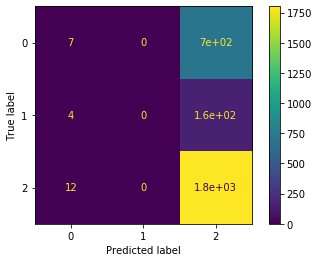

In [ ]:
disp =metrics.plot_confusion_matrix(lm, X_test, y_test)
disp.confusion_matrix

## Logistic_Regression_Combination

In [ ]:
def logistic_combi(combi_list):
    logistic_scores = []
    
    for i in combi_list:
        
        X = nf2[i]
        y = nf2['stance_cat']

        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

        #print('X_train dimension= ', X_train.shape)
        #print('X_test dimension= ', X_test.shape)
        #print('y_train dimension= ', y_train.shape)
        #print('y_train dimension= ', y_test.shape)

        lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
        lm.fit(X_train, y_train)

        logistic_scores.append(lm.score(X_test, y_test))
        
    return logistic_scores

In [ ]:
logistic_combi(combi_list = xyz)

[0.6753536857781087,
 0.6757259865971705,
 0.6746090841399851,
 0.6749813849590469,
 0.6749813849590469,
 0.6749813849590469,
 0.6760982874162323,
 0.6746090841399851,
 0.6753536857781087,
 0.6757259865971705,
 0.6749813849590469,
 0.6746090841399851,
 0.6764705882352942,
 0.6753536857781087,
 0.6760982874162323,
 0.6746090841399851,
 0.6746090841399851,
 0.6746090841399851,
 0.6749813849590469,
 0.6749813849590469,
 0.6749813849590469,
 0.6742367833209233,
 0.6753536857781087,
 0.6760982874162323,
 0.6753536857781087,
 0.6738644825018615,
 0.6742367833209233,
 0.6734921816827997,
 0.6749813849590469,
 0.6749813849590469,
 0.6746090841399851,
 0.6746090841399851,
 0.6746090841399851,
 0.6753536857781087,
 0.6760982874162323,
 0.6760982874162323,
 0.6757259865971705,
 0.6746090841399851,
 0.6753536857781087,
 0.6746090841399851,
 0.6746090841399851,
 0.6731198808637379,
 0.6742367833209233,
 0.6746090841399851,
 0.6753536857781087,
 0.6753536857781087,
 0.6757259865971705,
 0.6738644825

### Checking_Accuracy_On_Test_Data

In [ ]:
test_data.head()

,Unnamed: 0,Headline,Body ID,articleBody,jaccard_similarity,Headline_Nouns,articleBody_Nouns,jaccard_similarity_nouns,Headline_POS,articleBody_POS,Stance,glove_similarity,kl_divergence,ngram_overlap,semantic_similarity
0,0,ferguson riots pregnant woman loses eye cops f...,2008,respected senior french police officer investi...,0.000000,cops eye car riots bag woman window round,limoges office commissioners town supermarket ...,0.000000,bean cops fire eye pregnant car riots bag ferg...,limoges like particular supermarket mirror pai...,unrelated,0.826379,1.779193,3.619346,0.215232
1,1,crazy conservatives sure gitmo detainee killed...,1550,dave morin social networking company path repo...,0.000000,james conservatives detainee,email path ceo aims techcrunch newsletter pric...,0.000000,conservatives crazy foley james sure detainee ...,email newsletter acquisition incorporated acco...,unrelated,0.385693,1.583847,2.895936,0.195279
2,2,russian guy says justin bieber ringtone saved ...,2,bereaved afghan mother took revenge taliban wa...,13.157895,bieber guy justin ringtone attack,gains weapon daughterinlaw hamid taliban week ...,29.850746,attack says saved bieber bear guy russian just...,particular using tuesday check daughter broadc...,unrelated,0.608556,1.430374,3.064907,0.065617
3,3,zombie cat buried kitty believed dead meows ba...,1793,hewlettpackard officially splitting two follow...,0.000000,life cat zombie meows,position part experiences leo acquisition part...,0.000000,buried life zombie dead meows believed cat kitty,position laptop appointed part particular expe...,unrelated,0.288972,1.035248,2.895936,0.095281
4,4,argentina president adopts boy end werewolf curse,37,airline passenger headed dallas removed plane ...,0.000000,president adopts werewolf curse,workers plane everyone board airline attendant...,0.000000,president end adopts curse argentina boy werewolf,began workers celebrates plane everyone board ...,unrelated,0.560040,2.025043,2.708069,0.227776


In [ ]:
nf1 = nf[['Body ID', 'Stance',
       'stance_cat', 'stance_base','Headline_POS','articleBody_POS',
       'jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence', 'ngram_overlap',
       'semantic_similarity',"LDA_Score"]]

In [ ]:
nf2 = nf1[nf1.Stance != "unrelated" ]

In [ ]:
nf2.head(10)

,Body ID,Stance,stance_cat,stance_base,Headline_POS,articleBody_POS,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,semantic_similarity,LDA_Score
1,158,agree,0,related,dams flee hundreds gaza opens israel floods pa...,prevented save families wake rain israeli drop...,82.840237,129.870130,0.848720,0.567896,2.895936,0.409437,0.000000
4,1923,disagree,1,related,tourist stomach chest spider burrowed,seen dig mark somebody humans spider mites bod...,28.169014,41.237113,0.584935,0.379117,2.244121,0.510268,0.000000
5,154,agree,0,related,goes confirms news total december experience d...,twitter khan godoy happen declared dates jammi...,151.162791,120.481928,0.932023,0.565897,3.494641,0.603162,0.561813
8,1739,agree,0,related,revealed hoax arrested identity year last real,excellence seen journalism pulitzerprize filth...,55.555556,28.571429,0.862320,1.019032,2.708069,0.352266,0.000000
10,2327,discuss,2,related,pundit gateway,seen twitter health embassies execution older ...,0.000000,0.000000,0.300276,0.216263,1.000000,0.098096,0.030796
11,1468,agree,0,related,woman wife albaghdadi lebanon detained iraq says,discovered aleqtisadia ibrahim meanwhile ident...,60.606061,68.965517,0.904196,0.474797,2.708069,0.547912,0.000000
14,47,discuss,2,related,york arrest new marijuana lead ticket,changes launch avoid nypd attorney issues peop...,86.956522,62.500000,0.850264,0.726360,2.494644,0.416550,0.000000
16,2463,discuss,2,related,denies boko ceasefire nigeria claim haram,moms deputy institute chibok launch daughter l...,28.776978,51.282051,0.491887,0.357341,2.494644,0.379237,0.000000
17,295,agree,0,related,rip plant robert contract,london turn berlin locales wanted learn plant ...,70.588235,125.000000,0.726433,0.420545,1.933151,0.264428,0.946211
19,608,discuss,2,related,beheads photojournalist iraq isil american,knees executed execution went story year showe...,46.511628,0.000000,0.702423,1.603451,2.244121,0.497526,0.000000


In [ ]:
test_data2 = test_data[test_data.Stance != "unrelated"]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords

In [ ]:
# x = nf2[['jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence', 'ngram_overlap',"semantic_similarity"
#        ]]
# y = nf2['Stance']
# xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1, random_state = 101)
# rg = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [ ]:
xtrain2 = nf2[['jaccard_similarity', 'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence', 'ngram_overlap',"semantic_similarity"]]
xtrain2.head()

,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,semantic_similarity
1,82.840237,129.870130,0.848720,0.567896,2.895936,0.409437
4,28.169014,41.237113,0.584935,0.379117,2.244121,0.510268
5,151.162791,120.481928,0.932023,0.565897,3.494641,0.603162
8,55.555556,28.571429,0.862320,1.019032,2.708069,0.352266
10,0.000000,0.000000,0.300276,0.216263,1.000000,0.098096


In [ ]:
ytrain2 = nf2['Stance'] 

In [ ]:
xtest2 = test_data2[["jaccard_similarity","jaccard_similarity_nouns","glove_similarity","kl_divergence","ngram_overlap","semantic_similarity"]]

In [ ]:
ytest2 = test_data2["Stance"]
ytest2.head()

10      agree
12    discuss
14    discuss
15      agree
20    discuss
Name: Stance, dtype: object

In [ ]:
xtest2.head()

,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,semantic_similarity
10,116.129032,115.942029,0.813591,0.629705,3.064907,0.696609
12,85.106383,55.555556,0.903726,0.745236,2.895936,0.583600
14,135.135135,142.857143,0.851480,0.988929,2.708069,0.677605
15,18.348624,43.478261,0.666805,0.153956,1.000000,0.091031
20,170.731707,157.894737,0.852883,1.346604,3.361780,0.566414


In [ ]:
print('X Training shape',xtrain2.shape)
print('Y Training shape',ytrain2.shape)
xtrain2 = xtrain2.values.reshape(-1,6)
xtest2 = xtest2.values.reshape(-1,6)

X Training shape (13427, 6)
Y Training shape (13427,)


In [ ]:
rg.fit(xtrain2,ytrain2)
ypred2 = rg.predict(xtest2)
print('Accuracy score on three class ',accuracy_score(ypred2,ytest2))

Accuracy score on three class  0.6071630804077011


In [ ]:
ypred2[:20]

array(['discuss', 'discuss', 'discuss', 'discuss', 'discuss', 'discuss',
       'discuss', 'discuss', 'discuss', 'discuss', 'discuss', 'discuss',
       'agree', 'discuss', 'discuss', 'discuss', 'discuss', 'discuss',
       'discuss', 'discuss'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(ypred2,ytest2))
print(confusion_matrix(ypred2,ytest2))

              precision    recall  f1-score   support

       agree       0.13      0.34      0.19       710
    disagree       0.00      0.00      0.00         2
     discuss       0.91      0.64      0.75      6352

    accuracy                           0.61      7064
   macro avg       0.34      0.33      0.31      7064
weighted avg       0.83      0.61      0.69      7064

[[ 242   52  416]
 [   1    0    1]
 [1660  645 4047]]


In [ ]:
nf2.head()

,Body ID,Stance,stance_cat,stance_base,Headline_POS,articleBody_POS,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,semantic_similarity,LDA_Score
1,158,agree,0,related,dams flee hundreds gaza opens israel floods pa...,prevented save families wake rain israeli drop...,82.840237,129.870130,0.848720,0.567896,2.895936,0.409437,0.000000
4,1923,disagree,1,related,tourist stomach chest spider burrowed,seen dig mark somebody humans spider mites bod...,28.169014,41.237113,0.584935,0.379117,2.244121,0.510268,0.000000
5,154,agree,0,related,goes confirms news total december experience d...,twitter khan godoy happen declared dates jammi...,151.162791,120.481928,0.932023,0.565897,3.494641,0.603162,0.561813
8,1739,agree,0,related,revealed hoax arrested identity year last real,excellence seen journalism pulitzerprize filth...,55.555556,28.571429,0.862320,1.019032,2.708069,0.352266,0.000000
10,2327,discuss,2,related,pundit gateway,seen twitter health embassies execution older ...,0.000000,0.000000,0.300276,0.216263,1.000000,0.098096,0.030796


In [ ]:
test_data2.head()

,Unnamed: 0,Headline,Body ID,articleBody,jaccard_similarity,Headline_Nouns,articleBody_Nouns,jaccard_similarity_nouns,Headline_POS,articleBody_POS,Stance,glove_similarity,kl_divergence,ngram_overlap,semantic_similarity
10,10,exclusive apple unveil longawaited retina macb...,1964,last week apple sent invites spring forward ev...,116.129032,spring event macbook air unveil apple,production april processors michael combines m...,115.942029,retina spring event macbook exclusive air unve...,production real thinner credible ports air rep...,agree,0.813591,0.629705,3.064907,0.696609
12,12,found missing afghan soldiers spotted trying e...,2312,three afghanistan national army officers disap...,85.106383,enter afghan soldiers canada,anyone officers training week pause intent edw...,55.555556,missing soldiers spotted afghan enter found ca...,several training sure nbc men arrived went gov...,discuss,0.903726,0.745236,2.895936,0.583600
14,14,report three missing afghan soldiers caught ca...,1754,toronto three missing afghan soldiers taken cu...,135.135135,afghan report soldiers border,custody part mall training states program edwa...,142.857143,caught missing soldiers canadian afghan report...,custody unnamed several part mall training sta...,discuss,0.851480,0.988929,2.708069,0.677605
15,15,woman fake,1618,woman claiming third breast play hoax us snope...,18.348624,woman,anyone officers play business complaint person...,43.478261,fake woman,threatened actions men details nilesh accordin...,agree,0.666805,0.153956,1.000000,0.091031
20,20,isis might harvesting organs iraqi ambassador ...,930,isis using blood money harvesting organs fund ...,170.731707,organs isis ambassador tells hostages reports,organs envoy graves council militants particip...,157.894737,organs un isis alive ambassador burned tells h...,organs envoy human using graves tuesday counci...,discuss,0.852883,1.346604,3.361780,0.566414


In [ ]:
def combinations_test_data(combi_list):
    score = []
    for i in combi_list:
        from sklearn.metrics import accuracy_score
        from sklearn.model_selection import train_test_split
        from sklearn.ensemble import RandomForestClassifier
        from nltk.corpus import stopwords


        #xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1, random_state = 101)
        xtrain3 = nf2[i]
        ytrain3 = nf2['Stance'] 
        xtest3 = test_data2[i]
        ytest3 = test_data2["Stance"]
        rg = RandomForestClassifier(n_estimators=100,n_jobs=-1)


        r = len(i)
        #print('X Training shape',xtrain.shape)
        #print('Y Training shape',ytrain.shape)
        xtrain3 = xtrain3.values.reshape(-1,r)
        xtest3 = xtest3.values.reshape(-1,r)

        rg.fit(xtrain3,ytrain3)
        ypred2 = rg.predict(xtest3)
        print('Accuracy score on three class ',accuracy_score(ypred2,ytest3))

        #ypred2[:20]

        from sklearn.metrics import classification_report, confusion_matrix

        print(classification_report(ypred2,ytest3))
        print(confusion_matrix(ypred2,ytest3))
        score.append(accuracy_score(ypred2,ytest3))
    print("max accuracy" ,max(score))
    print(score)


In [ ]:
combinations_test_data(combi_list = xyz)


Accuracy score on three class  0.5897508493771234
              precision    recall  f1-score   support

       agree       0.11      0.28      0.16       743
    disagree       0.03      0.18      0.05       102
     discuss       0.88      0.63      0.74      6219

    accuracy                           0.59      7064
   macro avg       0.34      0.36      0.31      7064
weighted avg       0.79      0.59      0.67      7064

[[ 209   64  470]
 [  29   18   55]
 [1665  615 3939]]
Accuracy score on three class  0.6138165345413363
              precision    recall  f1-score   support

       agree       0.05      0.30      0.09       314
    disagree       0.01      0.14      0.01        37
     discuss       0.95      0.63      0.76      6713

    accuracy                           0.61      7064
   macro avg       0.34      0.36      0.29      7064
weighted avg       0.90      0.61      0.72      7064

[[  95   15  204]
 [   8    5   24]
 [1800  677 4236]]
Accuracy score on three clas

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       agree       0.00      0.16      0.01        31
    disagree       0.00      0.00      0.00         0
     discuss       0.99      0.63      0.77      7033

    accuracy                           0.63      7064
   macro avg       0.33      0.26      0.26      7064
weighted avg       0.99      0.63      0.77      7064

[[   5    2   24]
 [   0    0    0]
 [1898  695 4440]]
Accuracy score on three class  0.49419592298980747
              precision    recall  f1-score   support

       agree       0.27      0.27      0.27      1930
    disagree       0.05      0.08      0.07       436
     discuss       0.66      0.63      0.64      4698

    accuracy                           0.49      7064
   macro avg       0.33      0.33      0.33      7064
weighted avg       0.52      0.49      0.50      7064

[[ 516  181 1233]
 [ 106   37  293]
 [1281  479 2938]]
Accuracy score on three class  0.5359569648924122
              precision    

 [1272  463 2927]]
Accuracy score on three class  0.5804077010192525
              precision    recall  f1-score   support

       agree       0.13      0.28      0.18       924
    disagree       0.01      0.16      0.03        63
     discuss       0.86      0.63      0.73      6077

    accuracy                           0.58      7064
   macro avg       0.34      0.36      0.31      7064
weighted avg       0.76      0.58      0.65      7064

[[ 256   77  591]
 [  14   10   39]
 [1633  610 3834]]
Accuracy score on three class  0.5830973952434881
              precision    recall  f1-score   support

       agree       0.16      0.30      0.20      1004
    disagree       0.02      0.22      0.03        58
     discuss       0.85      0.63      0.73      6002

    accuracy                           0.58      7064
   macro avg       0.34      0.38      0.32      7064
weighted avg       0.75      0.58      0.65      7064

[[ 297   86  621]
 [  11   13   34]
 [1595  598 3809]]
Accuracy 

Accuracy score on three class  0.5869195922989807
              precision    recall  f1-score   support

       agree       0.13      0.28      0.18       874
    disagree       0.00      0.12      0.01        17
     discuss       0.87      0.63      0.73      6173

    accuracy                           0.59      7064
   macro avg       0.34      0.34      0.31      7064
weighted avg       0.78      0.59      0.66      7064

[[ 245   79  550]
 [   0    2   15]
 [1658  616 3899]]
Accuracy score on three class  0.5737542468856173
              precision    recall  f1-score   support

       agree       0.18      0.29      0.22      1175
    disagree       0.01      0.08      0.02        75
     discuss       0.83      0.64      0.72      5814

    accuracy                           0.57      7064
   macro avg       0.34      0.34      0.32      7064
weighted avg       0.71      0.57      0.63      7064

[[ 342  121  712]
 [  22    6   47]
 [1539  570 3705]]
Accuracy score on three clas

Accuracy score on three class  0.585079275198188
              precision    recall  f1-score   support

       agree       0.13      0.28      0.18       876
    disagree       0.01      0.17      0.01        24
     discuss       0.87      0.63      0.73      6164

    accuracy                           0.59      7064
   macro avg       0.33      0.36      0.31      7064
weighted avg       0.78      0.59      0.66      7064

[[ 244   72  560]
 [   1    4   19]
 [1658  621 3885]]
Accuracy score on three class  0.6002265005662514
              precision    recall  f1-score   support

       agree       0.13      0.32      0.18       782
    disagree       0.00      0.08      0.00        12
     discuss       0.89      0.64      0.74      6270

    accuracy                           0.60      7064
   macro avg       0.34      0.35      0.31      7064
weighted avg       0.81      0.60      0.68      7064

[[ 248   64  470]
 [   8    1    3]
 [1647  632 3991]]
Accuracy score on three class

In [ ]:
nf.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Headline', 'Body ID', 'Stance',
       'articleBody', 'stance_cat', 'stance_base', 'jaccard_similarity',
       'Headline_Nouns', 'articleBody_Nouns', 'jaccard_similarity_nouns',
       'Headline_POS', 'articleBody_POS', 'glove_similarity', 'kl_divergence',
       'ngram_overlap', 'LDA_Score', 'semantic_similarity'],
      dtype='object')

In [ ]:
nf_new = nf[['stance_cat', 'stance_base', 'jaccard_similarity','jaccard_similarity_nouns','glove_similarity', 'kl_divergence',
       'ngram_overlap', 'LDA_Score', 'semantic_similarity',"Stance"]]
nf_new.sample(10)

,stance_cat,stance_base,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,LDA_Score,semantic_similarity,Stance
35110,3,unrelated,0.000000,0.000000,0.474104,0.906181,2.494644,0.000000,0.141020,unrelated
47544,2,related,296.296296,117.647059,0.763619,1.031097,3.064907,0.000000,0.717590,discuss
44124,3,unrelated,0.000000,0.000000,0.764155,1.176679,3.064907,0.438670,0.238716,unrelated
48927,3,unrelated,0.000000,0.000000,0.728471,1.779193,2.244121,0.000000,-0.026410,unrelated
42736,3,unrelated,0.000000,0.000000,0.576884,0.900117,2.895936,0.000000,0.212174,unrelated
49392,3,unrelated,18.181818,0.000000,0.668473,1.468410,2.708069,0.067200,0.289156,unrelated
39071,3,unrelated,0.000000,0.000000,0.766163,1.452171,2.708069,0.281308,0.346458,unrelated
34173,3,unrelated,0.000000,0.000000,0.603671,1.552206,2.895936,0.026969,0.258587,unrelated
12380,2,related,101.694915,135.593220,0.669762,0.939118,2.895936,0.000000,0.763652,discuss
13632,3,unrelated,0.000000,0.000000,0.340904,0.649717,2.244121,0.000000,0.125652,unrelated


In [ ]:
nf_new[nf_new.Stance == "unrelated"].describe()

,stance_cat,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,LDA_Score,semantic_similarity
count,36545.0,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000
mean,3.0,6.999757,6.954941,0.622928,1.317463,2.753865,0.061468,0.180962
std,0.0,15.285830,20.683618,0.158681,0.458580,0.464756,0.195810,0.110235
min,3.0,0.000000,0.000000,-0.349954,0.057835,1.000000,0.000000,-0.254802
25%,3.0,0.000000,0.000000,0.534873,0.979569,2.494644,0.000000,0.104968
50%,3.0,0.000000,0.000000,0.649936,1.321180,2.708069,0.000000,0.179499
75%,3.0,11.111111,0.000000,0.738525,1.650599,3.064907,0.000000,0.254445
max,3.0,333.333333,400.000000,0.941576,2.259718,4.338225,1.000000,0.711639


In [ ]:
nf_new[nf_new.Stance == "agree"].describe()

,stance_cat,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,LDA_Score,semantic_similarity
count,3678.0,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,0.0,107.365230,128.555384,0.741983,0.850124,2.730113,0.055156,0.508054
std,0.0,138.783803,171.329794,0.143065,0.389934,0.476519,0.159731,0.127612
min,0.0,0.000000,0.000000,-0.148962,0.000000,1.000000,0.000000,0.028723
25%,0.0,50.955414,54.054054,0.682168,0.569926,2.494644,0.000000,0.427498
50%,0.0,78.125000,93.023256,0.773064,0.793239,2.708069,0.000000,0.515122
75%,0.0,118.518519,142.857143,0.839942,1.073181,3.064907,0.014668,0.596061
max,0.0,2000.000000,2000.000000,1.000000,2.259718,4.338225,1.000000,1.000000


In [ ]:
nf_new[nf_new.Stance == "disagree"].describe()

,stance_cat,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,LDA_Score,semantic_similarity
count,840.0,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,1.0,83.563098,100.499279,0.737880,0.862162,2.722015,0.086481,0.461760
std,0.0,74.490493,113.215675,0.143973,0.401417,0.423571,0.211975,0.116777
min,1.0,0.000000,0.000000,-0.059271,0.040929,1.000000,0.000000,0.028316
25%,1.0,42.083149,45.326864,0.672635,0.548439,2.494644,0.000000,0.386511
50%,1.0,62.111801,72.949002,0.768535,0.801258,2.708069,0.000000,0.462319
75%,1.0,99.173554,122.448980,0.839035,1.099882,2.938179,0.032530,0.542567
max,1.0,727.272727,1500.000000,0.946814,2.230626,4.056793,1.000000,0.758383


In [ ]:
nf_new[nf_new.Stance == "discuss"].describe()

,stance_cat,jaccard_similarity,jaccard_similarity_nouns,glove_similarity,kl_divergence,ngram_overlap,LDA_Score,semantic_similarity
count,8909.0,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000
mean,2.0,96.775513,110.214100,0.762689,0.802622,2.738472,0.043240,0.491433
std,0.0,103.115515,127.463634,0.125562,0.397114,0.474722,0.135537,0.126616
min,2.0,0.000000,0.000000,-0.080913,0.000000,1.000000,0.000000,-0.071665
25%,2.0,44.117647,44.444444,0.703664,0.506938,2.494644,0.000000,0.415447
50%,2.0,70.588235,75.949367,0.791005,0.738081,2.708069,0.000000,0.498541
75%,2.0,111.111111,131.147541,0.851589,1.028748,3.064907,0.000000,0.574527
max,2.0,2000.000000,2000.000000,1.000000,2.259634,4.338225,1.000000,1.000000


## Logistic Regression on Test Data

In [ ]:
def logistic_combi_test_data(combi_list):
    logistic_scores = []
    
    for i in combi_list:
        
  
        xtrain = nf2[i]
        ytrain = nf2['Stance'] 
        xtest = test_data2[i]
        ytest = test_data2["Stance"]

        #print('X_train dimension= ', X_train.shape)
        #print('X_test dimension= ', X_test.shape)
        #print('y_train dimension= ', y_train.shape)
        #print('y_train dimension= ', y_test.shape)

        lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
        lm.fit(X_train, y_train)

        logistic_scores.append(lm.score(X_test, y_test))
        
    return logistic_scores

In [ ]:
logistic_combi_test_data(xyz)

[0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808637379,
 0.6731198808

In [ ]:
nf_new.columns

Index(['stance_cat', 'stance_base', 'jaccard_similarity',
       'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence',
       'ngram_overlap', 'LDA_Score', 'semantic_similarity', 'Stance'],
      dtype='object')

In [ ]:
nf_new_knn =  nf_new[['jaccard_similarity',
       'jaccard_similarity_nouns', 'glove_similarity', 'kl_divergence',
       'ngram_overlap', 'LDA_Score', 'semantic_similarity', 'Stance']]

In [ ]:
#nf_new_knn = nf_new_knn_1[nf_new_knn_1.Stance != "unrelated"]

In [ ]:
def knn_combination(combi_list):
    
    for i in combi_list:
        X = dataset[i].values
        y = dataset["Stance"].values
        
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaler.fit(X_train)

        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors=2)
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)

        
        from sklearn.metrics import classification_report, confusion_matrix
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))


In [ ]:
knn_combination(combi_list = xyz)

[[385  31 323]
 [ 83  14  82]
 [810 107 851]]
              precision    recall  f1-score   support

       agree       0.30      0.52      0.38       739
    disagree       0.09      0.08      0.08       179
     discuss       0.68      0.48      0.56      1768

    accuracy                           0.47      2686
   macro avg       0.36      0.36      0.34      2686
weighted avg       0.54      0.47      0.48      2686

[[333  60 302]
 [ 84  20  65]
 [776 150 896]]
              precision    recall  f1-score   support

       agree       0.28      0.48      0.35       695
    disagree       0.09      0.12      0.10       169
     discuss       0.71      0.49      0.58      1822

    accuracy                           0.47      2686
   macro avg       0.36      0.36      0.34      2686
weighted avg       0.56      0.47      0.49      2686

[[387  61 324]
 [ 82  19  71]
 [778 128 836]]
              precision    recall  f1-score   support

       agree       0.31      0.50      0.38  

[[357  58 303]
 [ 84  23  75]
 [804 180 802]]
              precision    recall  f1-score   support

       agree       0.29      0.50      0.36       718
    disagree       0.09      0.13      0.10       182
     discuss       0.68      0.45      0.54      1786

    accuracy                           0.44      2686
   macro avg       0.35      0.36      0.34      2686
weighted avg       0.53      0.44      0.46      2686

[[377  48 299]
 [ 70  32  66]
 [786 145 863]]
              precision    recall  f1-score   support

       agree       0.31      0.52      0.39       724
    disagree       0.14      0.19      0.16       168
     discuss       0.70      0.48      0.57      1794

    accuracy                           0.47      2686
   macro avg       0.38      0.40      0.37      2686
weighted avg       0.56      0.47      0.50      2686

[[372  59 289]
 [ 68  28  52]
 [768 140 910]]
              precision    recall  f1-score   support

       agree       0.31      0.52      0.39  

              precision    recall  f1-score   support

       agree       0.30      0.53      0.38       719
    disagree       0.17      0.22      0.19       162
     discuss       0.71      0.48      0.57      1805

    accuracy                           0.47      2686
   macro avg       0.39      0.41      0.38      2686
weighted avg       0.57      0.47      0.50      2686

[[409  61 288]
 [ 73  17  74]
 [772 144 848]]
              precision    recall  f1-score   support

       agree       0.33      0.54      0.41       758
    disagree       0.08      0.10      0.09       164
     discuss       0.70      0.48      0.57      1764

    accuracy                           0.47      2686
   macro avg       0.37      0.37      0.35      2686
weighted avg       0.56      0.47      0.49      2686

[[408  54 280]
 [ 88  24  61]
 [713 145 913]]
              precision    recall  f1-score   support

       agree       0.34      0.55      0.42       742
    disagree       0.11      0.14    

              precision    recall  f1-score   support

       agree       0.33      0.55      0.41       723
    disagree       0.16      0.22      0.19       175
     discuss       0.73      0.50      0.59      1788

    accuracy                           0.49      2686
   macro avg       0.40      0.42      0.40      2686
weighted avg       0.58      0.49      0.52      2686

[[413  43 270]
 [ 66  34  63]
 [712 161 924]]
              precision    recall  f1-score   support

       agree       0.35      0.57      0.43       726
    disagree       0.14      0.21      0.17       163
     discuss       0.74      0.51      0.61      1797

    accuracy                           0.51      2686
   macro avg       0.41      0.43      0.40      2686
weighted avg       0.59      0.51      0.53      2686

[[436  43 244]
 [ 60  36  46]
 [743 139 939]]
              precision    recall  f1-score   support

       agree       0.35      0.60      0.44       723
    disagree       0.17      0.25    

In [ ]:
dataset = nf_new_knn.copy()

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 7].values

In [ ]:
y

array(['unrelated', 'agree', 'unrelated', ..., 'agree', 'discuss',
       'unrelated'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 398   47  251   26]
 [  66   36   63    8]
 [ 628  110  941   62]
 [  61   26  131 7141]]
              precision    recall  f1-score   support

       agree       0.35      0.55      0.42       722
    disagree       0.16      0.21      0.18       173
     discuss       0.68      0.54      0.60      1741
   unrelated       0.99      0.97      0.98      7359

    accuracy                           0.85      9995
   macro avg       0.54      0.57      0.55      9995
weighted avg       0.87      0.85      0.86      9995

